In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('Mall_Customers_Cluster3.csv')
df.head(3)

,Unnamed: 0,CustomerID,Genre,Age,Income,SpendingScore,class labels
0,0,1,Male,19,15,39,0
1,1,2,Male,21,15,81,0
2,2,3,Female,20,16,6,0


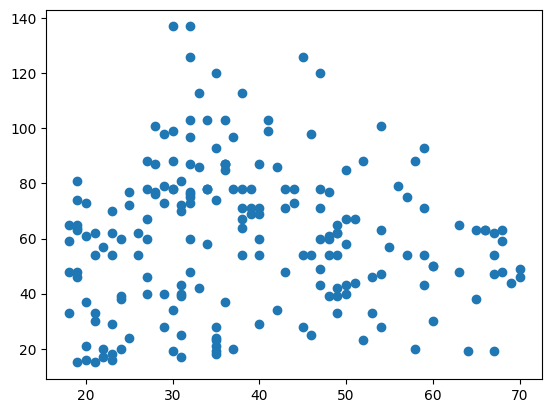

In [3]:
plt.scatter(df['Age'],df['Income'])

### using kmean:cluster

In [4]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3,n_init="auto")
km.fit(df[["Age","Income"]])
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [5]:
df['Cluster']=km.labels_
df.head()

,Unnamed: 0,CustomerID,Genre,Age,Income,SpendingScore,class labels,Cluster
0,0,1,Male,19,15,39,0,1
1,1,2,Male,21,15,81,0,1
2,2,3,Female,20,16,6,0,1
3,3,4,Female,23,16,77,0,1
4,4,5,Female,31,17,40,0,1


<Axes: xlabel='Age', ylabel='Income'>

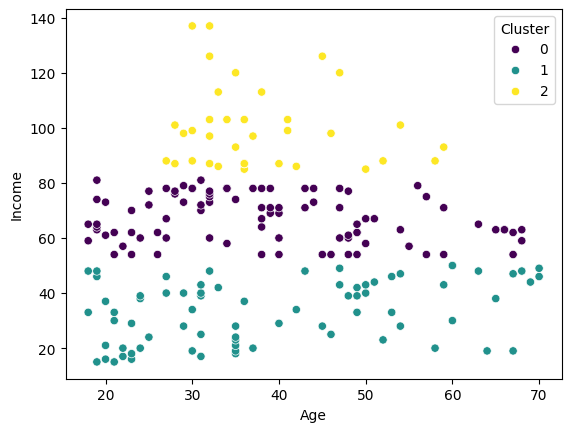

In [6]:
import seaborn as sns
sns.scatterplot(df,x='Age',y='Income',palette='viridis',hue='Cluster')


### scale the cluster

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled=pd.DataFrame(columns=['Age','Income'])

df_scaled[['Age','Income']]=scaler.fit_transform(df[['Age','Income']])
df_scaled.head()

,Age,Income
0,0.019231,0.000000
1,0.057692,0.000000
2,0.038462,0.008197
3,0.096154,0.008197
4,0.250000,0.016393


In [8]:
km=KMeans(n_clusters=3,n_init="auto")
km.fit(df_scaled[["Age","Income"]])
df_scaled['Cluster']=km.labels_
df_scaled.head()

,Age,Income,Cluster
0,0.019231,0.000000,0
1,0.057692,0.000000,0
2,0.038462,0.008197,0
3,0.096154,0.008197,0
4,0.250000,0.016393,0


In [9]:
km.inertia_

7.493024843304989

<Axes: xlabel='Age', ylabel='Income'>

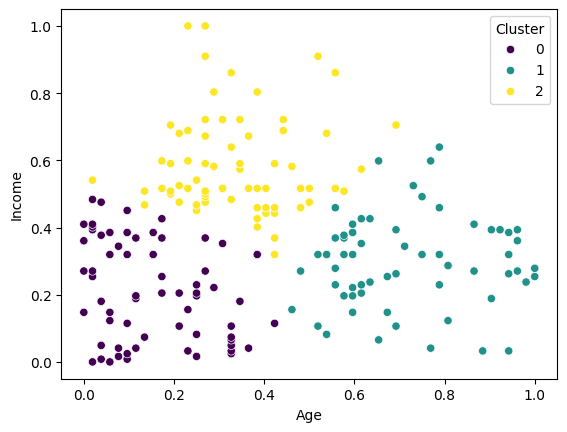

In [10]:
sns.scatterplot(df_scaled,x='Age',y='Income',palette='viridis',hue='Cluster')

In [11]:
centroid= km.cluster_centers_
centroid

array([[0.15264423, 0.21016906],
       [0.72175481, 0.29943648],
       [0.33653846, 0.58435792]])

<Axes: xlabel='Age', ylabel='Income'>

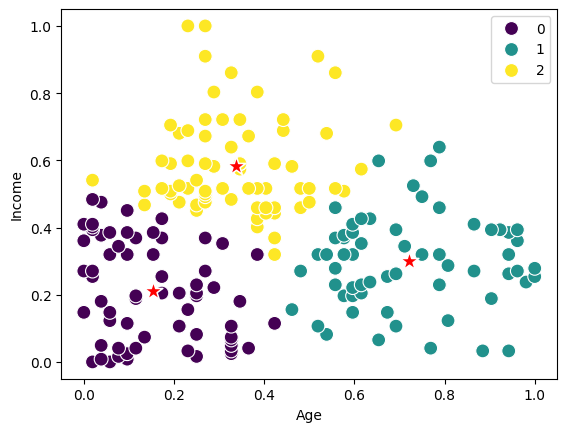

In [12]:
sns.scatterplot(df_scaled,x='Age',y='Income',palette='viridis',hue='Cluster',s=100)
sns.scatterplot(x=centroid[:,0],y=centroid[:,1], s=200, color="red", marker='*')

In [13]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k,n_init='auto')
    km.fit(df_scaled[["Income","Age"]])
    sse.append(km.inertia_)
sse

[23.58390615036361,
 13.031138697313132,
 7.493024843304989,
 6.096904589645639,
 4.713416604872824,
 3.8665020481969528,
 3.34553627809228,
 2.9749160955897924,
 2.3291765544665175]

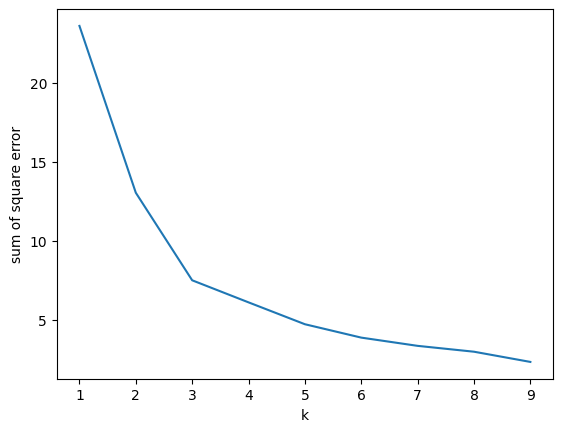

In [14]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage="average")
hc.fit(df[['Age','Income']])
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [17]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
X=df[['Age','Income']]
z=linkage(X,method='average')
z

array([[ 72.        ,  73.        ,   0.        ,   2.        ],
       [106.        , 109.        ,   0.        ,   2.        ],
       [101.        , 104.        ,   0.        ,   2.        ],
       [148.        , 149.        ,   0.        ,   2.        ],
       [158.        , 203.        ,   0.        ,   3.        ],
       [157.        , 159.        ,   0.        ,   2.        ],
       [168.        , 172.        ,   0.        ,   2.        ],
       [173.        , 206.        ,   0.        ,   3.        ],
       [  6.        ,  11.        ,   1.        ,   2.        ],
       [ 19.        ,  20.        ,   1.        ,   2.        ],
       [ 42.        ,  44.        ,   1.        ,   2.        ],
       [110.        , 201.        ,   1.        ,   3.        ],
       [ 43.        ,  49.        ,   1.        ,   2.        ],
       [ 41.        ,  45.        ,   1.        ,   2.        ],
       [ 79.        ,  85.        ,   1.        ,   2.        ],
       [ 92.        ,  96

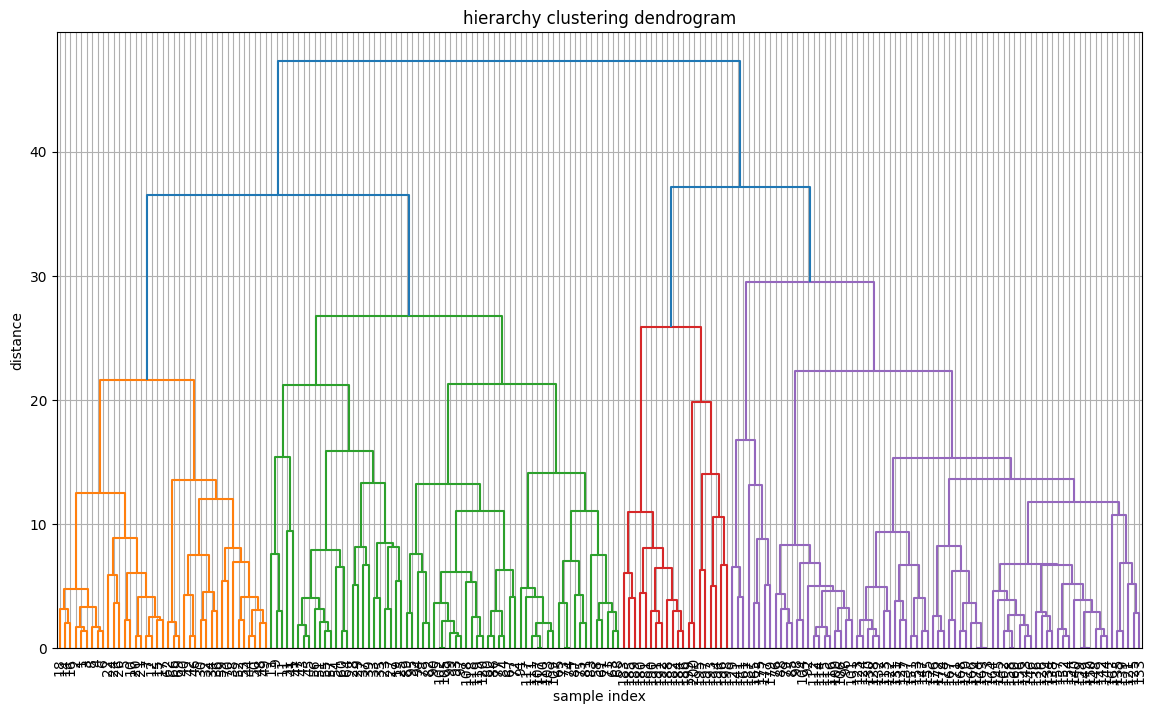

In [18]:
plt.figure(figsize=(14,8))
plt.title('hierarchy clustering dendrogram')
dendrogram(z, labels=df['CustomerID'].values,leaf_rotation=90, leaf_font_size=10)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.grid()
plt.show()

In [26]:
Cluster= fcluster(z, t=3, criterion='maxclust')
Cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

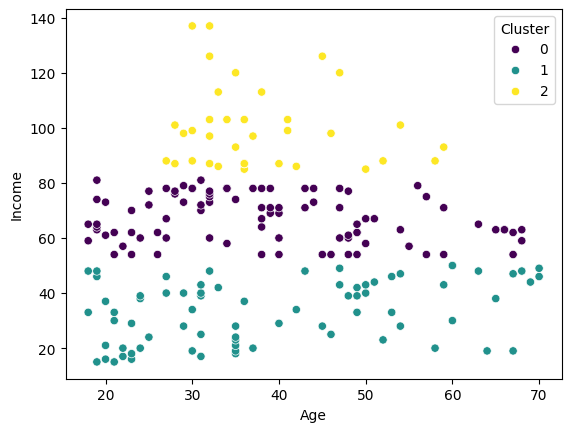

In [27]:
sns.scatterplot(df, x='Age', y= 'Income', palette='viridis', hue='Cluster')
plt.show()

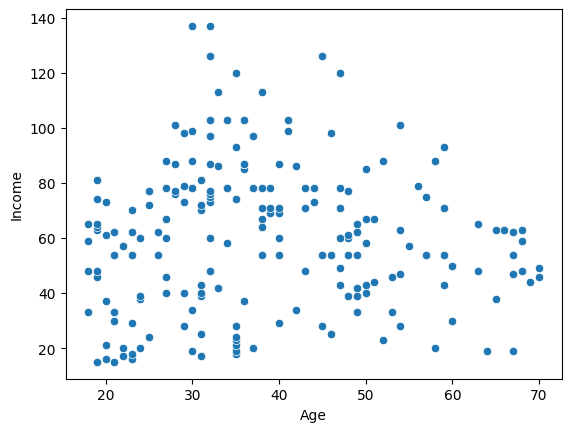

In [32]:
sns.scatterplot(df, x="Age",y="Income")
plt.show()

In [33]:
from sklearn.cluster import DBSCAN
ds = DBSCAN (eps=0.3, min_samples=10)
ds.fit(df[['Age','Income']])
ds.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])